In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, "../../")
sys.path.insert(0, "../")

from src.motifs.plotting import *
import src.motifs.motif as ml

import subprocess
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

#  Load Dataset

Dataset Original Length n:  10358
Dataset Sampled Length n:  10358


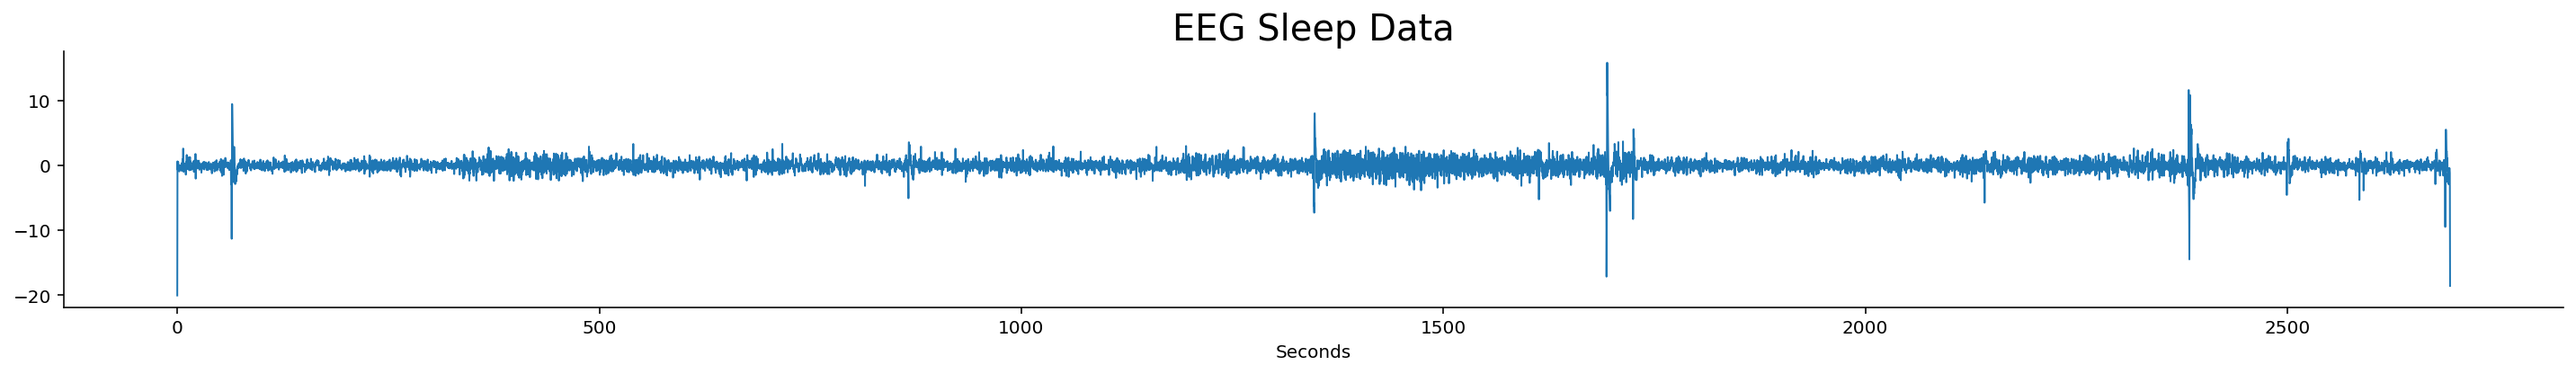

In [2]:
file = 'npo141.csv' # Dataset Length n:  269286
ds_name="EEG Sleep Data"
path = "../../"
series = ml.read_dataset_with_index(file, path) 
data = series.values
plot_dataset(file, series, ds_name=ds_name)

# Parameters

In [3]:
df = pd.DataFrame() # TOP-1

df_wsd = pd.read_csv("../../experiments/motifs/window_sizes.csv", index_col=0)
df_wsd.set_index("dataset", drop=True, inplace=True)
lengths = df_wsd.loc[file.split(".")[0]]
lengths

rerun_all_jars = False
motif_lengths = lengths.to_dict()
print(motif_lengths)

used_motif_lengths = []

dataset = os.getcwd() + "/" + path + 'datasets/motifs/original/' + file
print(dataset)

{'Ground Truth': 25, 'FFT': 20, 'ACF': 121, 'SuSS': 128, 'MWF': 372, 'Autoperiod': 22, 'RobustPeriod': -1}
/Users/bzcschae/workspace/window_size_detection/notebooks/motifs/../../datasets/motifs/original/npo141.csv


In [4]:
# recomputes the radii
if rerun_all_jars:
    rs = []
    for key in motif_lengths:
        motif_length = motif_lengths[key]
        if motif_length > -1:        
            dists, motiflets, elbow_points = plot_elbow(
                20, series, file, ds_name=ds_name, plot_elbows=False, plot=False,
                motif_length=motif_length, method_name="K-Motiflets")

            dists_non_nan = dists[elbow_points]
            rs.append(np.ceil(np.max(dists_non_nan)))
            print("Largest", np.max(dists_non_nan), dists_non_nan)
        else:
            rs.append(-1)
        
    print("Use these: ", rs)

# Set Finder
Runs java code:
- https://sites.google.com/site/timeseriesmotifsets/

In [5]:
rs = np.ceil(
        np.array([26.0, 19.0, 207.0, 222.0, 760.0, 21.0, -1]) / 2.0
        )

"""
if rerun_all_jars:
    for key, max_r in zip(motif_lengths, rs):
        l = motif_lengths[key]
        if max_r > 0:        
            radii = [max_r]# np.arange(1, max_r + 1, max(1, int(max_r / 5)))
            output = subprocess.call(['java', '-jar',
               '../../src/motifs/jars/set_finder.jar',
               dataset,
               'SetFinder',
               str(list(radii)),
               str(l)])
"""               

"\nif rerun_all_jars:\n    for key, max_r in zip(motif_lengths, rs):\n        l = motif_lengths[key]\n        if max_r > 0:        \n            radii = [max_r]# np.arange(1, max_r + 1, max(1, int(max_r / 5)))\n            output = subprocess.call(['java', '-jar',\n               '../../src/motifs/jars/set_finder.jar',\n               dataset,\n               'SetFinder',\n               str(list(radii)),\n               str(l)])\n"

In [6]:
# run jave code first       
all_ms_set_finder = {
#"Ground Truth":[
#	[5430, 5346, 5372, 5415, 5445, 5480, 5509, 5577, 5589, 5689, 5721, 5743, 5777, 6359],    
#    ],
"FFT":[
	[5431, 5347, 5358, 5373, 5416, 5446, 5457, 5481, 5510, 5534, 5553, 5578, 5590, 5605, 5690, 5722, 5744, 5778, 5983, 6075, 6360, 7145],    
    ],
"ACF":[   
	[6400, 3218, 5066, 9055, 9500, 9831, 10177],    
    ],
"SuSS":[
	[6393, 3211, 5059, 9048, 9493, 9824, 10170],    
    ],
"MWF":[   
	[6150, 8805, 9971],    
    ],
"Autoperiod":[ 
	[5431, 5290, 5347, 5362, 5373, 5416, 5446, 5457, 5481, 5510, 5534, 5578, 5590, 5690, 5722, 5744, 5778, 5987, 6360, 7145],    
    ],
"RobustPeriod":[  
    [-1]
    ]        
}

"""
for key in all_ms_set_finder:
    if len(all_ms_set_finder[key]) > 0:
        ms_set_finder = all_ms_set_finder[key]
        motif_length = motif_lengths[key]
        # print (key, motif_length)
        if motif_length > 0:        
            motifset = plot_competitors(series, ds_name, ms_set_finder, motif_length,
                                        prefix="Set-Finder", plot=False)
            df["Set Finder \n" + key] = [motifset[-1]]
        else:
            df["Set Finder \n" + key] = [[-1]]
            
        used_motif_lengths.append(motif_length) 
"""        

'\nfor key in all_ms_set_finder:\n    if len(all_ms_set_finder[key]) > 0:\n        ms_set_finder = all_ms_set_finder[key]\n        motif_length = motif_lengths[key]\n        # print (key, motif_length)\n        if motif_length > 0:        \n            motifset = plot_competitors(series, ds_name, ms_set_finder, motif_length,\n                                        prefix="Set-Finder", plot=False)\n            df["Set Finder \n" + key] = [motifset[-1]]\n        else:\n            df["Set Finder \n" + key] = [[-1]]\n            \n        used_motif_lengths.append(motif_length) \n'

# EMMA

Runs Java Code
- https://github.com/jMotif/SAX

In [7]:
if rerun_all_jars:
    for key, max_r in zip(motif_lengths, rs):
        l = motif_lengths[key]
        # radii = np.arange(1, max_r + 1, max(1, int(max_r / 5)))
        if max_r > 0:        
            radii = [max_r]        
            output = subprocess.call(['java', '-jar', 
               '../../src/motifs/jars/emma.jar',
               dataset,
               str(list(radii)),
               str(l)])

In [8]:
# run jave code first       
all_ms_emma = {
#"Ground Truth":[
#	[5427, 5446, 5473, 5510, 5522, 5534, 5694, 5714, 5748, 5782, 6071],    
#    ],
"FFT":[
	[2654, 5290, 5347, 5366, 5377, 5416, 5450, 5485, 5510, 5522, 5534, 5586, 5690, 5726, 5748, 5760, 5782, 6059, 6079, 6364],    
    ],
"ACF":[   
	[135, 3219, 6401, 9056, 9501, 9832, 10178],    
    ],
"SuSS":[
	[127, 3211, 6393, 9048, 9493, 9824, 10170],    
    ],
"MWF":[   
	[4815, 8804, 9970],    
    ],
"Autoperiod":[ 
	[5373, 5416, 5427, 5446, 5461, 5477, 5514, 5526, 5538, 5694, 5710, 5748, 5782, 5819, 6071, 6364],    
    ],
"RobustPeriod":[  
    [-1]    
    ] 
}

for key in all_ms_emma:
    if len(all_ms_emma[key]) > 0:
        ms_emma = all_ms_emma[key]
        motif_length = motif_lengths[key]
        print (key, motif_length)
        if motif_length > 0:        
            motifset = plot_competitors(series, ds_name, ms_emma, motif_length, 
                                        prefix="EMMA", plot=False)
            df["EMMA \n" + key] = [motifset[-1]]
        else:
            df["EMMA \n" + key] = [[-1]]

        used_motif_lengths.append(motif_length)

FFT 20
Filtered Elbow Points [0]
ACF 121
Filtered Elbow Points [0]
SuSS 128
Filtered Elbow Points [0]
MWF 372
Filtered Elbow Points [0]
Autoperiod 22
Filtered Elbow Points [0]
RobustPeriod -1


# Learning Motifs
See Java Code

In [9]:
if rerun_all_jars:
    for key, max_r in zip(motif_lengths, rs):
        l = motif_lengths[key]
        #radii = np.arange(1, max_r + 1, max(1, int(max_r / 5)))
        radii = [max_r]
        if max_r > 0:        
            output = subprocess.call(['java', '-jar', 
               '../../src/motifs/jars/latent_motifs.jar',
               dataset,
               str(list(radii)),
               str(l)])

In [10]:
all_ms_learning_motifs = {
#"Ground Truth":[
#	[2697,6235,7573,8184,],    
#    ],
"FFT":[
	[3514,5320,5356,5371,5410,5599,5742,5828,6053,6350,7319,7611,9497,],    
    ],
"ACF":[   
	[186,6451,6572,],    
    ],
"SuSS":[
	[5245,9673,],    
    ],
"MWF":[   
	[2093,3221,5070,5334,6402,8125,9057,9502,9833,],    
    ],
"Autoperiod":[ 
	[1799,5349,5364,5379,5414,5433,5512,5621,5657,5724,5907,6095,6117,6946,],    
    ],
"RobustPeriod":[  
    [-1]
    ] 
}
    
for key in all_ms_learning_motifs:
    if len(all_ms_learning_motifs[key]) > 0:
        ms_learning_motifs = all_ms_learning_motifs[key]
        motif_length = motif_lengths[key]
        print (key, motif_length)    
        if motif_length>0:        
            motifset = plot_competitors(data, ds_name, ms_learning_motifs, motif_length, 
                                        prefix="LM", plot=False)

            df["LM \n" + key] = [motifset[-1]]
        else:
            df["LM \n" + key] = [[-1]]
            
        used_motif_lengths.append(motif_length)

FFT 20
Filtered Elbow Points [0]
ACF 121
Filtered Elbow Points [0]
SuSS 128
Filtered Elbow Points [0]
MWF 372
Filtered Elbow Points [0]
Autoperiod 22
Filtered Elbow Points [0]
RobustPeriod -1


# Comparison

In [11]:
df_all = df.T
df_all.rename(columns={0:"offsets"}, inplace=True)
df_all

,offsets
EMMA \nFFT,"[2654, 5290, 5347, 5366, 5377, 5416, 5450, 548..."
EMMA \nACF,"[135, 3219, 6401, 9056, 9501, 9832, 10178]"
EMMA \nSuSS,"[127, 3211, 6393, 9048, 9493, 9824, 10170]"
EMMA \nMWF,"[4815, 8804, 9970]"
EMMA \nAutoperiod,"[5373, 5416, 5427, 5446, 5461, 5477, 5514, 552..."
EMMA \nRobustPeriod,[-1]
LM \nFFT,"[3514, 5320, 5356, 5371, 5410, 5599, 5742, 582..."
LM \nACF,"[186, 6451, 6572]"
LM \nSuSS,"[5245, 9673]"
LM \nMWF,"[2093, 3221, 5070, 5334, 6402, 8125, 9057, 950..."


['EMMA \nFFT' 'EMMA \nACF' 'EMMA \nSuSS' 'EMMA \nMWF' 'EMMA \nAutoperiod'
 'EMMA \nRobustPeriod' 'LM \nFFT' 'LM \nACF' 'LM \nSuSS' 'LM \nMWF'
 'LM \nAutoperiod' 'LM \nRobustPeriod']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


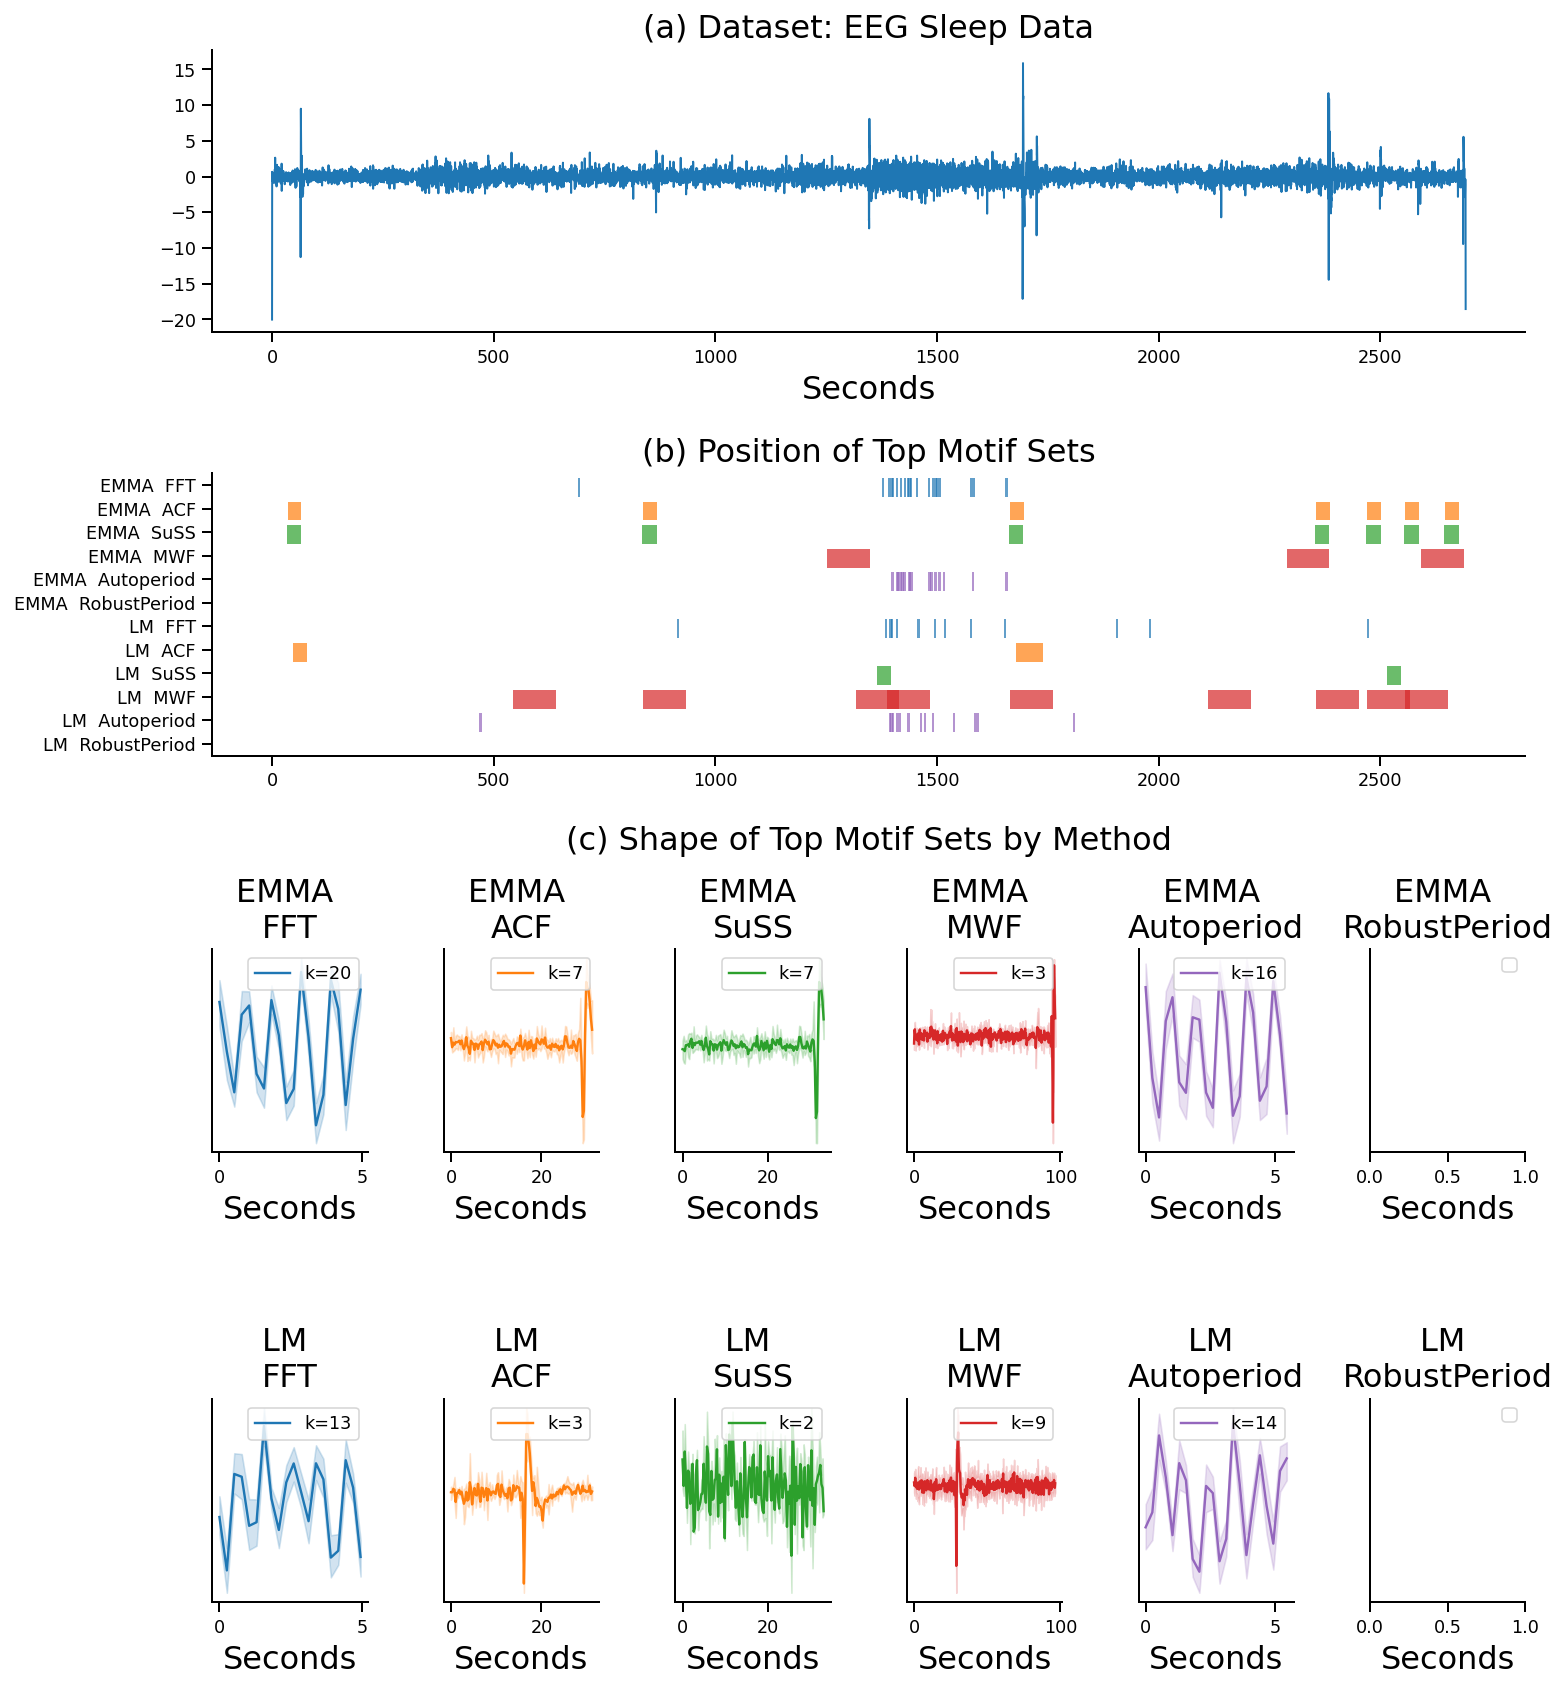

In [12]:
motifsets = np.array(df_all["offsets"].values)
print (df_all.index.values)
plot_all_competitors(series, ds_name, motifsets, used_motif_lengths, 
                     method_names=df_all.index.values)